## Author : Muhammad Jaleed

## Supervised Machine Learning

## The Sparks Foundation (Task 1)

Problem Statement: Predict the percentage of a student based on the no. of study hours

In [119]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
# read csv file from a link
csv_url = 'http://bit.ly/w-data'
df = pd.read_csv(csv_url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [121]:
# check for data types and null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [122]:
# Statistical investigation of data 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [123]:
# check out number of rows and columns
df.shape

(25, 2)

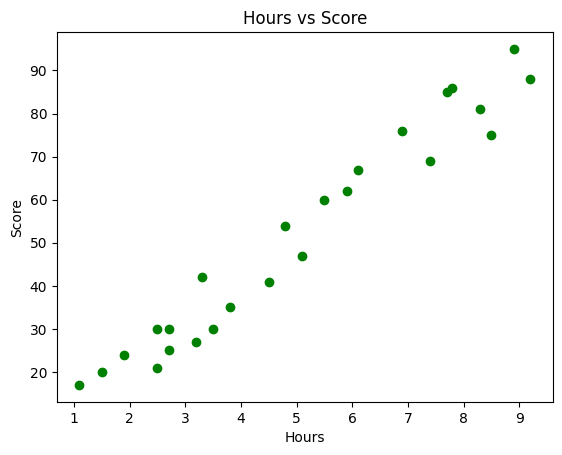

In [124]:
# scatter plot to check for the correlation between target and predictor variable
plt.scatter(x = df['Hours'], y = df['Scores'], c = 'green')
plt.title('Hours vs Score')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

<Axes: >

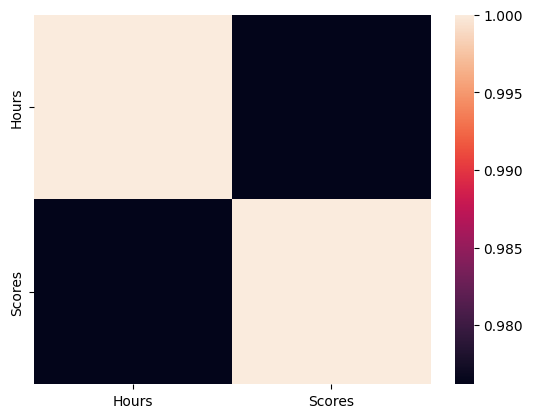

In [125]:
sns.heatmap(df.corr())

In [126]:
# separate target and predictor variables
X = df['Hours']
y = df['Scores']

In [127]:
X

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

In [128]:
# reshape the predictor variable
X = X.values.reshape(-1,1) 

In [129]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [130]:
# import sklearn libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [131]:
# divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [132]:
# instantiate Linear Regression
regressor = LinearRegression()

In [133]:
# train the model 
regressor.fit(X_train, y_train)

LinearRegression()

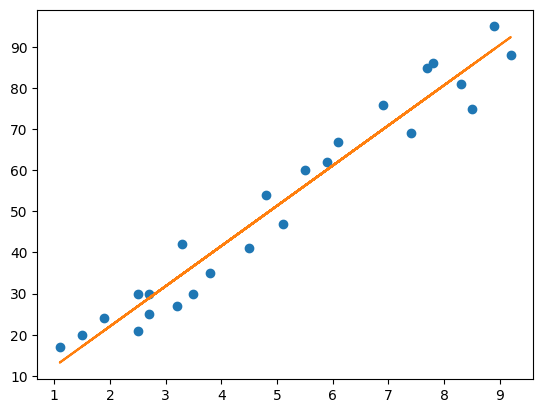

In [134]:
X = df['Hours']
y = df['Scores']
plt.plot(X, y, 'o')
m, b = np.polyfit(X, y, 1)
plt.plot(X, m*X + b)

In [135]:
# predict using testing data
y_pred = regressor.predict(X_test)

In [136]:
y_pred

array([60.97045394, 88.00715275, 73.52320696, 68.69522503, 12.69063464,
       55.17687562, 28.14017681, 20.41540573])

In [137]:
# make a dataframe of actual and preicted values to compare them side by side
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
18,67,60.970454
15,95,88.007153
19,69,73.523207
23,76,68.695225
14,17,12.690635
7,60,55.176876
9,25,28.140177
17,24,20.415406


<Axes: >

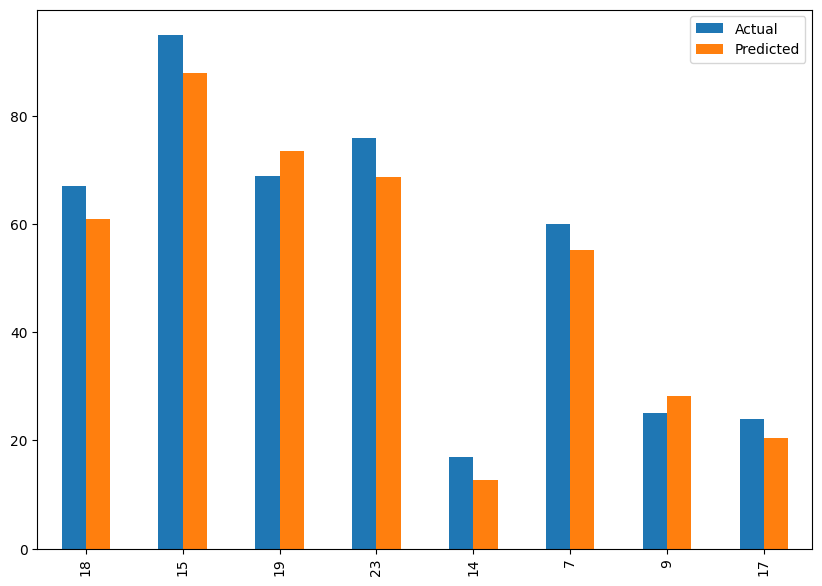

In [138]:
df.plot(kind = 'bar', figsize = (10,7))

In [139]:
# predict on a user defined value
hours = np.array([9.25]).reshape(1, 1)
predicted_score = regressor.predict(hours)

In [140]:
print(predicted_score)

[91.3867401]


In [141]:
# model accuracy
regressor.score(X_test, y_test)

0.960802355507588